In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding , LSTM,Dense
import matplotlib.pyplot as plt



In [2]:
tf.__version__

'2.16.1'

In [3]:
with open('shakespeare-hamlet.txt','r') as file:
    docs=file.read()

In [4]:
# docs

In [5]:
# Tokenization and Sequence Generation of each sentence
tokenizer=Tokenizer()
tokenizer.fit_on_texts([docs])
# tokenizer.word_index


In [6]:
vocabulary_size=len(tokenizer.word_index)+1
print(vocabulary_size)

4818


In [7]:
# Inspect the word Associated with specific index (Verification purpose)
for word,index in tokenizer.word_index.items():
    if index==4000:
        print(word)
    if index==4817:
        print(word)

coach
finis


In [8]:
#Creating Input Sequences for training the model
input_sequence=[]
for sentence in docs.split("\n"):
    tokenized_sentence=tokenizer.texts_to_sequences([sentence])[0]
    for i in range (1,len(tokenized_sentence)):
        input_sequence.append(tokenized_sentence[:i+1])



In [9]:
# input_sequence

In [10]:
# All rows are of differnt length so Padding is required
max_sequence_length=max([len(x) for x in input_sequence])
max_sequence_length

14

In [11]:
padded_input_sequence=pad_sequences(input_sequence,maxlen=max_sequence_length,padding='pre')
padded_input_sequence

array([[   0,    0,    0, ...,    0,    1,  687],
       [   0,    0,    0, ...,    1,  687,    4],
       [   0,    0,    0, ...,  687,    4,   45],
       ...,
       [   0,    0,    0, ...,    4,   45, 1047],
       [   0,    0,    0, ...,   45, 1047,    4],
       [   0,    0,    0, ..., 1047,    4,  193]])

In [12]:
# Splitting input and output sentences
x=padded_input_sequence[:,:-1]
y=padded_input_sequence[:,-1]
print(x[0])
print(y[0])

[0 0 0 0 0 0 0 0 0 0 0 0 1]
687


In [13]:
# Applying One-Hot Encoding on the Output labels (y)
y=to_categorical(y,num_classes=vocabulary_size) 

In [14]:
y[0]


array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
# Build the LSTM Model
model=Sequential()
model.add(Embedding(input_dim=vocabulary_size,output_dim=100))
model.add(LSTM(100))
model.add(Dense(vocabulary_size,activation='softmax'))


In [16]:
# Model Compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [17]:
# Model Summary
model.build(input_shape=(None, max_sequence_length))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 14, 100)        │       481,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4818)           │       486,618 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,048,818 (4.00 MB)

 Trainable params: 1,048,818 (4.00 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history=model.fit(x, y, epochs=100)

Epoch 1/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.0295 - loss: 7.0898
Epoch 2/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.0443 - loss: 6.4398
Epoch 3/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - accuracy: 0.0557 - loss: 6.2049
Epoch 4/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.0654 - loss: 5.9831
Epoch 5/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.0857 - loss: 5.7155
Epoch 6/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.0916 - loss: 5.4880
Epoch 7/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1036 - loss: 5.2812
Epoch 8/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1150 - loss: 5.0590
Epoch 9/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1303 - loss: 4.8576
Epoch 10/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1476 - loss: 4.6427
Epoch 11/100
805/805 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.1633 - loss: 4.4768
Epoch 12/100
805/805 

In [19]:
# Extract loss and accuracy values from the history object
accuracy = history.history['accuracy']
loss = history.history['loss']


epochs = range(1, len(loss) + 1)

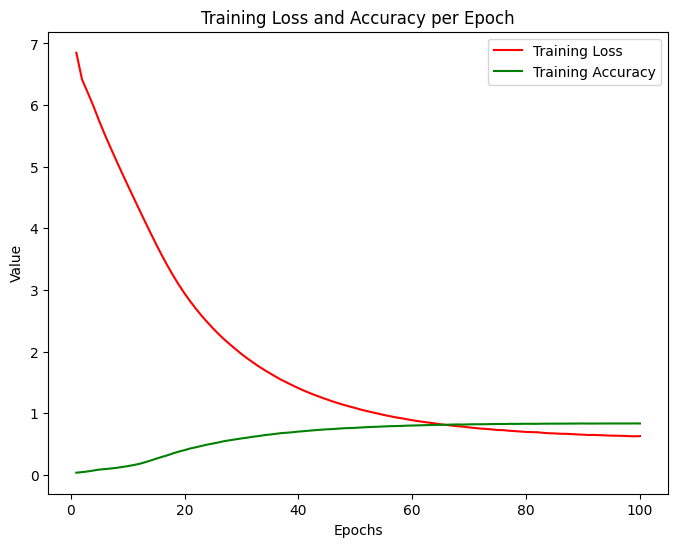

In [20]:
plt.figure(figsize=(8, 6))

plt.plot(epochs, loss, 'r', label='Training Loss') 
plt.plot(epochs, accuracy, 'g', label='Training Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Loss and Accuracy per Epoch')
plt.legend()

plt.show()

In [21]:
model.evaluate(x,y)

805/805 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8462 - loss: 0.5829


[0.5738629102706909, 0.8493315577507019]

In [22]:
# Next Word Prediction Function

def prediction(text:str, n_word:int)->str:
    for _ in range(n_word):
        # Convert the input text to sequences (tokenized)
        token_text = tokenizer.texts_to_sequences([text])[0]
        
        # Pad the sequence to the max sequence length expected by the model
        padded_token_input = pad_sequences([token_text], maxlen=max_sequence_length, padding="pre")
        
        # Predict the probabilities for the next word
        output_prob = model.predict(padded_token_input, verbose=0)
        
        # Find the word with the highest probability
        pos = np.argmax(output_prob)
        
        # Map the predicted index back to the corresponding word
        for word, index in tokenizer.word_index.items():
            if index == pos:
                # Append the predicted word to the input text
                text = text + " " + word
                break
    
    return text

In [23]:
text="The Tragedie of Hamlet"
n_word=4
prediction(text,n_word)

'The Tragedie of Hamlet by william shakespeare 1599'

In [24]:
text="God blesse"
n_word=2
prediction(text,n_word)


'God blesse you well'